## 1. Confusion Matrix Basics

A confusion matrix is a 2×2 table that compares predicted labels with actual labels.

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |


#### TP (True Positive): Model correctly predicts positive cases.

#### TN (True Negative): Model correctly predicts negative cases.

#### FP (False Positive): Model wrongly predicts positive (Type I error).

#### FN (False Negative): Model wrongly predicts negative (Type II error).

### 2. Accuracy

 Accuracy=
TP+TN/TP+TN+FP+FN


Measures the overall correctness of the model.

Problem: Can be misleading if the dataset is imbalanced (e.g., 95% negatives, 5% positives).

### 3. Precision (Positive Predictive Value)

Precision=
TP/TP+FP



Out of all the predicted positives, how many are actually positive.

High precision = model makes fewer false alarms.

Example: In spam detection, precision tells us how many of the predicted spam emails were actually spam.

### 4. Recall (Sensitivity / True Positive Rate)

Recall=
TP/TP+FN

Out of all actual positives, how many did the model correctly predict.

High recall = model catches most positives but may also predict many false positives.

Example: In medical diagnosis, recall is critical because you don’t want to miss a patient with a disease.

### 5. F1-Score
F1= 2⋅(Precision⋅Recall/Precision+Recall)


Harmonic mean of precision and recall.

Best when you want a balance between precision & recall.

Useful when data is imbalanced.

### 6. F-Beta Score

Generalization of F1-score.

β determines weight:

β > 1 → Recall is more important (e.g., medical tests).

β < 1 → Precision is more important (e.g., spam filters).

β = 1 → F1 score (equal weight).

### 🔹 1. Balanced Classification Problems

Example: Predicting if an image is a cat or a dog (roughly 50/50 split).

Best metric:

#### Accuracy (since false positives and false negatives are equally important).

#### ROC-AUC (if you also want to compare thresholds).

### 🔹 2. Imbalanced Classification Problems

Example: Fraud detection (fraud cases are <1%).

Problem with Accuracy: A model predicting “no fraud” 100% of the time gets 99% accuracy → misleading.

#### Best metrics:

Precision, Recall, F1-score

AUC-ROC / PR (Precision-Recall) Curve (better for highly imbalanced data).

MCC if you want a single balanced score.

### 🔹 3. When False Positives Are Very Costly

Examples:

Spam detection → flagging real emails as spam annoys users.

Credit card approval → wrongly rejecting genuine applicants.

#### Best metric:

Precision (focus on avoiding false positives).

Fβ-score with β < 1 (weight more on precision).

### 🔹 4. When False Negatives Are Very Costly

Examples:

Disease diagnosis → missing a sick patient is dangerous.

Fraud detection → letting fraud slip through costs money.

#### Best metric:

Recall (Sensitivity) (catch as many positives as possible).

Fβ-score with β > 1 (weight more on recall).

### 🔹 5. Multi-Class Classification

Examples: Handwriting recognition (digits 0–9).

#### Best metrics:

Accuracy if classes are balanced.

Macro-averaged F1 if classes are imbalanced (treats all classes equally).

Weighted F1 if some classes are more important.

### 🔹 6. Ranking / Probability-Based Models

Examples:

Recommender systems.

Click-through rate prediction.

#### Best metrics:

ROC-AUC (ranking quality).

Log loss / Cross-entropy (penalizes wrong probability estimates).

### 🔹 7. Binary Classification with High Stakes

Examples: Self-driving car detecting pedestrians.

#### Best metrics:

Precision, Recall, F1 (depending on which error is riskier).

ROC-AUC & PR-AUC for threshold tuning.

### ✅ Quick Decision Rule:

#### Balanced data → Accuracy, ROC-AUC

#### Imbalanced data → Precision, Recall, F1, PR-AUC

#### Cost of False Positives high → Precision

#### Cost of False Negatives high → Recall

#### Want balance → F1

#### Probabilistic models → Log loss, AUC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score



In [2]:
# Step 1: Create dataset (true labels and predicted labels)
y_true = np.array([1,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1])  # actual labels
y_pred = np.array([1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,1])  # predicted labels



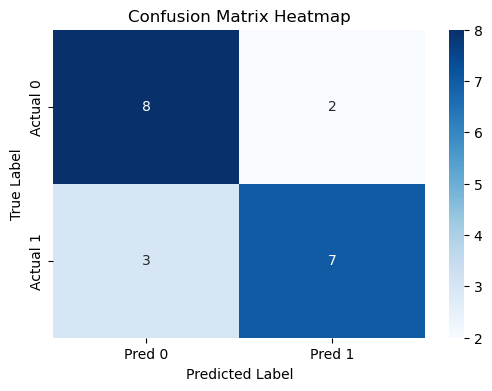

In [3]:
# Step 2: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 3: Plot confusion matrix using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()




In [4]:
# Step 4: Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Step 5: Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Class 0","Class 1"]))

Accuracy: 0.75
Precision: 0.7777777777777778
Recall: 0.7
F1 Score: 0.7368421052631579

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.73      0.80      0.76        10
     Class 1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20

